In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establish Connection between SQL Server and Python Code
# Establishing the connection
connection = mysql.connector.connect(
    user='root',
    password='**********',
    host='localhost',
    database='anu_project'
)
print('connection established')

cursor = connection.cursor()
cursor.execute('SELECT * FROM housing')
# Fetching data in chunks
column_names = [desc[0] for desc in cursor.description]
data = cursor.fetchall()
print("Data fetched successfully")
    
# Creating DataFrame
housing = pd.DataFrame(data, columns=column_names)
print("DataFrame created successfully")
    
print(housing)

connection established
Data fetched successfully
DataFrame created successfully
       UniqueID         ParcelID                  LandUse  \
0             1  105 11 0 080.00            SINGLE FAMILY   
1             2  118 03 0 130.00            SINGLE FAMILY   
2             3  119 01 0 479.00            SINGLE FAMILY   
3             4  119 05 0 186.00            SINGLE FAMILY   
4             5  119 05 0 387.00            SINGLE FAMILY   
...         ...              ...                      ...   
26004     56607  176 09 0 003.00            SINGLE FAMILY   
26005     56612  081 16 0 197.00  VACANT RESIDENTIAL LAND   
26006     56614  082 05 0 040.00            SINGLE FAMILY   
26007     56615  082 05 0 058.00            SINGLE FAMILY   
26008     56616  082 05 0 098.00  VACANT RESIDENTIAL LAND   

                      PropertyAddress          SaleDate  SalePrice  \
0         1802  STEWART PL, NASHVILLE  January 11, 2013     191500   
1        2761  ROSEDALE PL, NASHVILLE  January 

In [10]:
# Perform EDA
housing.info()
df = housing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26009 entries, 0 to 26008
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         26009 non-null  int64  
 1   ParcelID         26009 non-null  object 
 2   LandUse          26009 non-null  object 
 3   PropertyAddress  25991 non-null  object 
 4   SaleDate         26009 non-null  object 
 5   SalePrice        26009 non-null  int64  
 6   LegalReference   26009 non-null  object 
 7   SoldAsVacant     26009 non-null  object 
 8   OwnerName        25255 non-null  object 
 9   OwnerAddress     26009 non-null  object 
 10  Acreage          26009 non-null  object 
 11  TaxDistrict      26009 non-null  object 
 12  LandValue        26009 non-null  object 
 13  BuildingValue    26009 non-null  object 
 14  TotalValue       26009 non-null  object 
 15  YearBuilt        24157 non-null  float64
 16  Bedrooms         24151 non-null  object 
 17  FullBath    

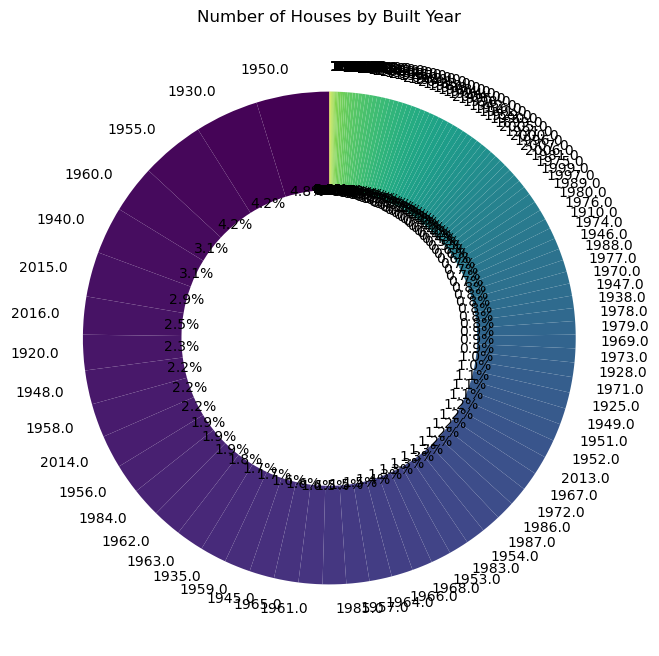

In [12]:
#pie char of houses sold by built year
# Convert the YearBuilt column to numeric (if it's not already)
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')

# Drop rows with NaN values in YearBuilt
df = df.dropna(subset=['YearBuilt'])

# Group by YearBuilt and count the number of houses
year_built_counts = df['YearBuilt'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
year_built_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', wedgeprops=dict(width=0.4))
plt.title('Number of Houses by Built Year')
plt.ylabel('')
plt.show()

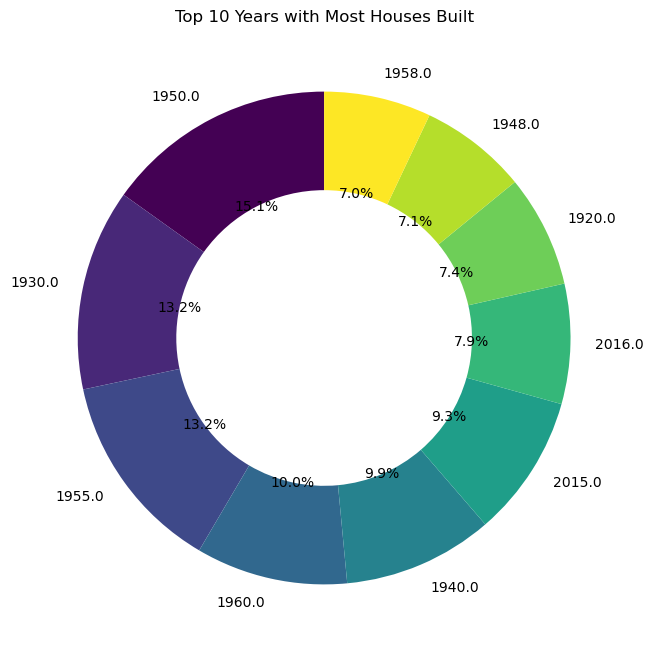

In [13]:
# top 10 houses sold by built year
# Group by YearBuilt and count the number of houses
year_built_counts = df['YearBuilt'].value_counts().head(10)  # Get top 10 years

# Plotting the pie chart
plt.figure(figsize=(10, 8))
year_built_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', wedgeprops=dict(width=0.4))
plt.title('Top 10 Years with Most Houses Built')
plt.ylabel('')
plt.show()

C:\Users\Qais\AppData\Local\Temp\ipykernel_19012\16729925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SaleDate'] = pd.to_datetime(df['SaleDate'])
C:\Users\Qais\AppData\Local\Temp\ipykernel_19012\16729925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['SaleDate'].dt.to_period('M')


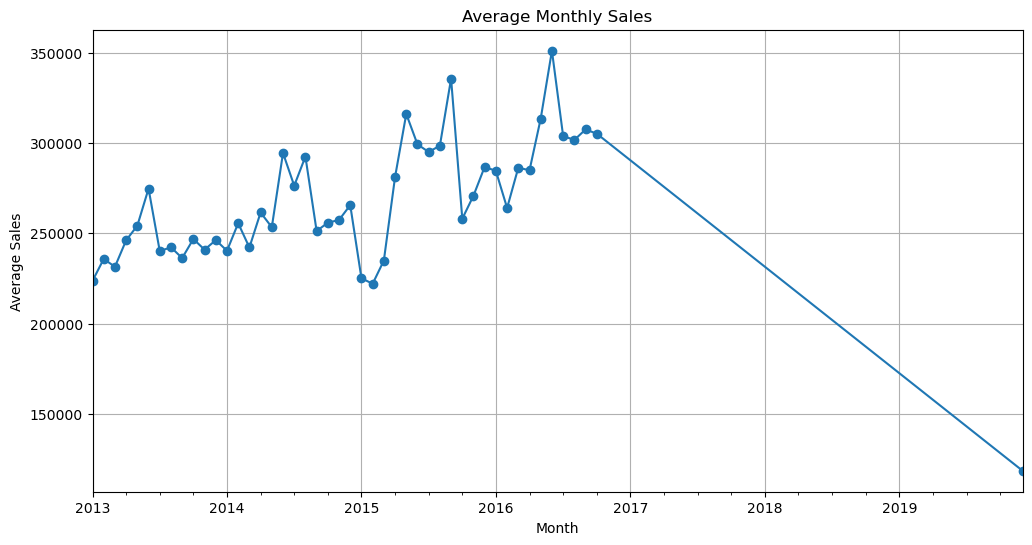

In [16]:
#create a chart to show the average number of sales every month
# Ensure the 'SaleDate' column is in datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract the month and year from the 'SaleDate' column
df['Month'] = df['SaleDate'].dt.to_period('M')

# Group by month and calculate the average sales
monthly_sales_avg = df.groupby('Month')['SalePrice'].mean()

# Plotting the average monthly sales
plt.figure(figsize=(12, 6))
monthly_sales_avg.plot(kind='line', marker='o')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

C:\Users\Qais\AppData\Local\Temp\ipykernel_19012\3323180614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['SaleDate'].dt.to_period('M')


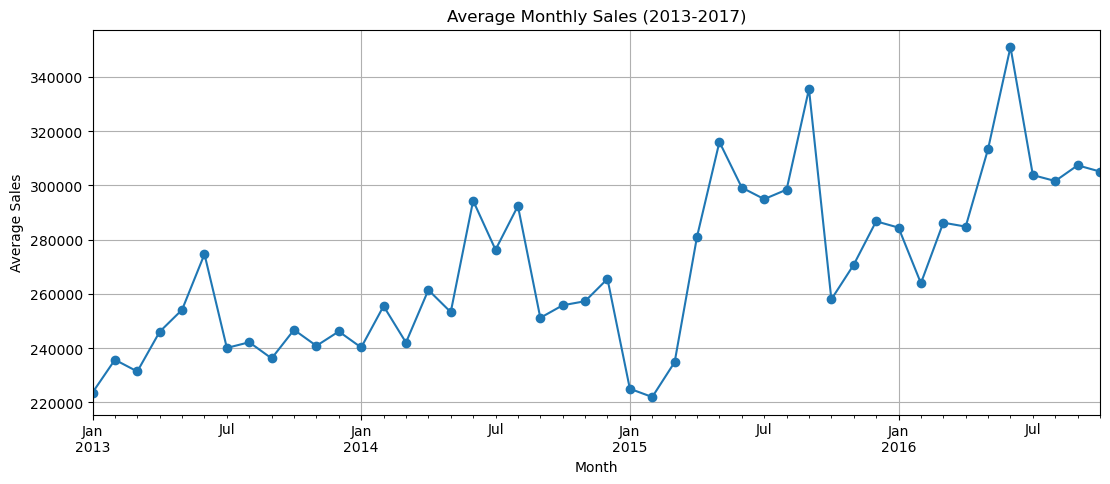

In [23]:
#create a chart to show the average number of sales every month from 2013 to 2017
# Filter the dataframe to include only sales from 2013 to 2017
df_filtered = df[(df['SaleDate'].dt.year >= 2013) & (df['SaleDate'].dt.year <= 2017)]

# Extract the month and year from the 'SaleDate' column
df_filtered['Month'] = df_filtered['SaleDate'].dt.to_period('M')

# Group by month and calculate the average sales
monthly_sales_avg = df_filtered.groupby('Month')['SalePrice'].mean()

# Plotting the average monthly sales
plt.figure(figsize=(13, 5))
monthly_sales_avg.plot(kind='line', marker='o')
plt.title('Average Monthly Sales (2013-2017)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

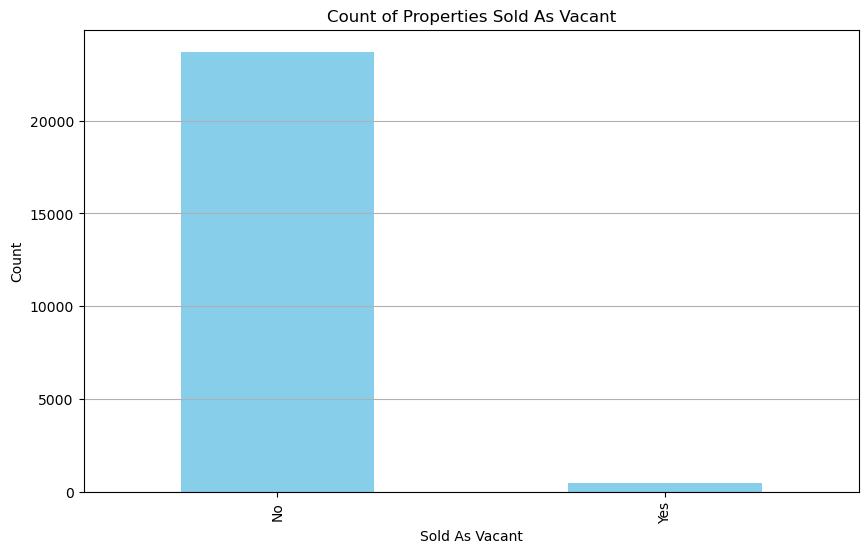

In [24]:
#create a bar graph so see hwo many housings sold as vacant or not
# Count the occurrences of each unique value in the 'SoldAsVacant' column
sold_as_vacant_counts = df['SoldAsVacant'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
sold_as_vacant_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sold As Vacant')
plt.ylabel('Count')
plt.title('Count of Properties Sold As Vacant')
plt.grid(axis='y')
plt.show()

TaxDistrict
URBAN SERVICES DISTRICT      18500
GENERAL SERVICES DISTRICT     4326
CITY OF GOODLETTSVILLE         368
CITY OF OAK HILL               361
CITY OF FOREST HILLS           361
CITY OF BELLE MEADE            220
CITY OF BERRY HILL              21
Name: count, dtype: int64


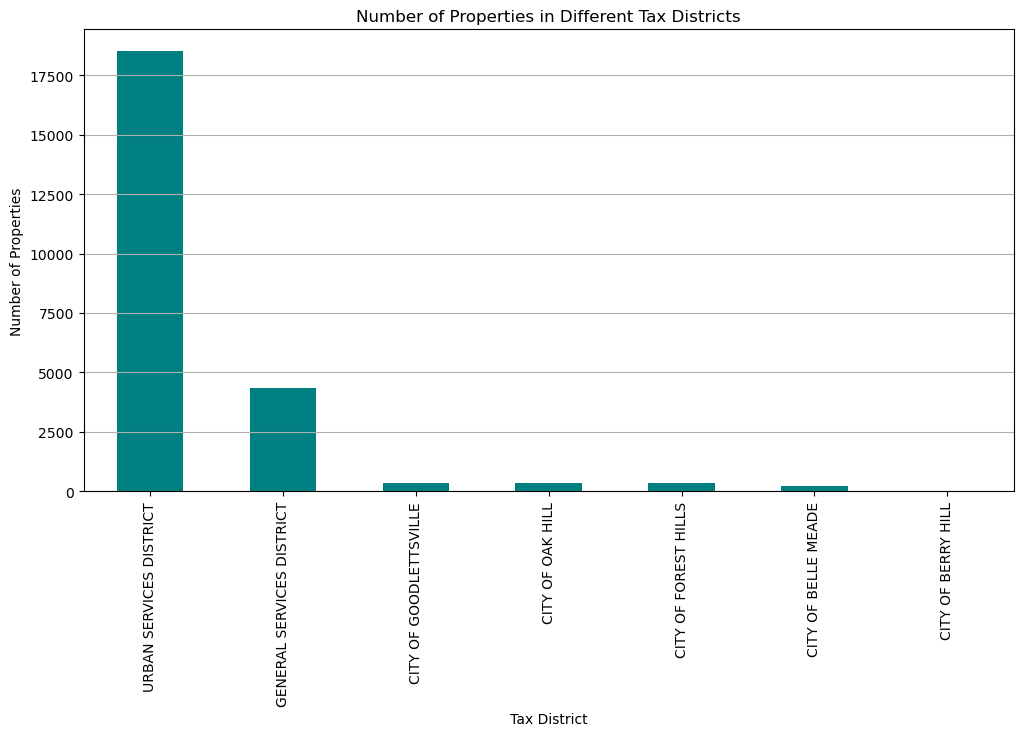

In [34]:
# Create a chart for different tax district
# Count the occurrences of each unique value in the TaxDistrict column
tax_district_counts = df['TaxDistrict'].value_counts()
print(tax_district_counts)
# Create a bar graph
plt.figure(figsize=(12, 6))
tax_district_counts.plot(kind='bar', color='teal')
plt.xlabel('Tax District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties in Different Tax Districts')
plt.grid(axis='y')
plt.show()

In [37]:
# find the average land value per acerage
# Convert the Acreage column to int64
df['Acreage'] = df['Acreage'].astype('int64', errors='ignore')
df['LandValue'] = df['LandValue'].astype('int64', errors='ignore')
# Filter the dataframe to include only entries where the Acreage column is not null
filtered_df = df[df['Acreage'].notnull()]

# Calculate the average land value for properties with acreage
average_land_value = filtered_df['LandValue'].mean()

print(f"Average Land Value for Properties with Acreage: {average_land_value:.2f}")

Average Land Value for Properties with Acreage: 68904.82


C:\Users\Qais\AppData\Local\Temp\ipykernel_19012\981735596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acreage'] = df['Acreage'].astype('int64', errors='ignore')
C:\Users\Qais\AppData\Local\Temp\ipykernel_19012\981735596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandValue'] = df['LandValue'].astype('int64', errors='ignore')


LandUse
SINGLE FAMILY               21384
DUPLEX                       1189
ZERO LOT LINE                 844
VACANT RESIDENTIAL LAND       270
VACANT RES LAND               231
TRIPLEX                        77
RESIDENTIAL COMBO/MISC         37
QUADPLEX                       34
CHURCH                         32
DORMITORY/BOARDING HOUSE       14
Name: count, dtype: int64


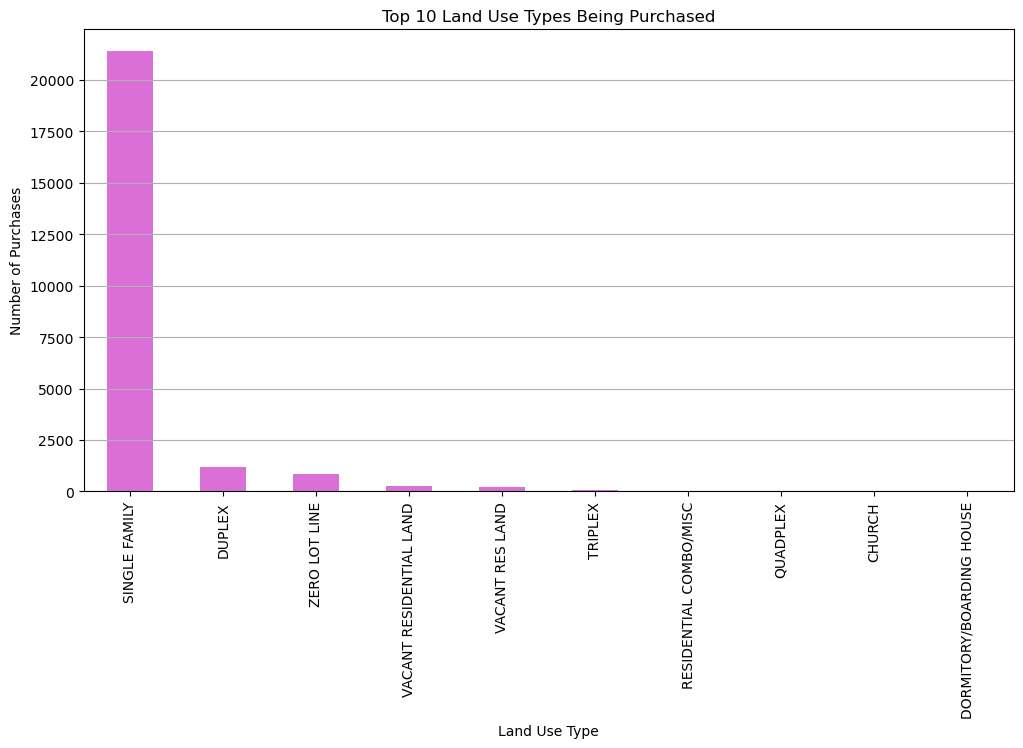

In [41]:
# create a chart for top 10 different type land useses being purchased from the above code
# Count the occurrences of each unique value in the LandUse column
land_use_counts = df['LandUse'].value_counts().head(10)  # Get top 10 land uses
print(land_use_counts)
# Create a bar graph
plt.figure(figsize=(12, 6))
land_use_counts.plot(kind='bar', color='orchid')
plt.xlabel('Land Use Type')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Land Use Types Being Purchased')
plt.grid(axis='y')
plt.show()

In [42]:
# show me people who own more than 5 property form this data
# Group by 'OwnerName' and count the number of properties each owner has
owners_with_more_than_5_properties = df['OwnerName'].value_counts()
owners_with_more_than_5_properties = owners_with_more_than_5_properties[owners_with_more_than_5_properties > 5]

# Display the owners with more than 5 properties
print(owners_with_more_than_5_properties)

OwnerName
JRG PROPERTIES, LLC         26
SUMMEY, CLARENCE            23
FED DEVELOPMENT, LLC        21
KHAZANOV, MAX               17
WALLACE, ANNE B.            14
                            ..
BENTLEY INVESTMENTS, LLC     6
FYKES, JOSHUA & TIFFANY      6
ENFIELD PROPERTIES, LLC      6
PEERY, BRUCE                 6
PLR PROPERTIES, LLC          6
Name: count, Length: 62, dtype: int64


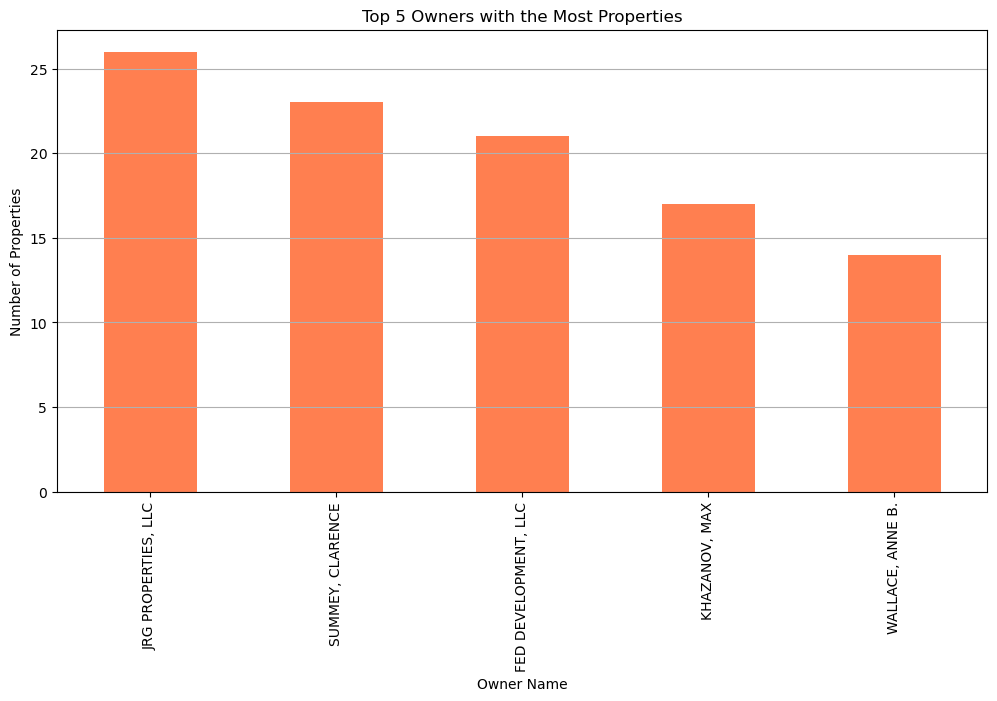

In [43]:
# create a chart of top 5 people who own the most properties
# Get the top 5 owners with the most properties
top_5_owners = owners_with_more_than_5_properties.head(5)

# Create a bar graph
plt.figure(figsize=(12, 6))
top_5_owners.plot(kind='bar', color='coral')
plt.xlabel('Owner Name')
plt.ylabel('Number of Properties')
plt.title('Top 5 Owners with the Most Properties')
plt.grid(axis='y')
plt.show()

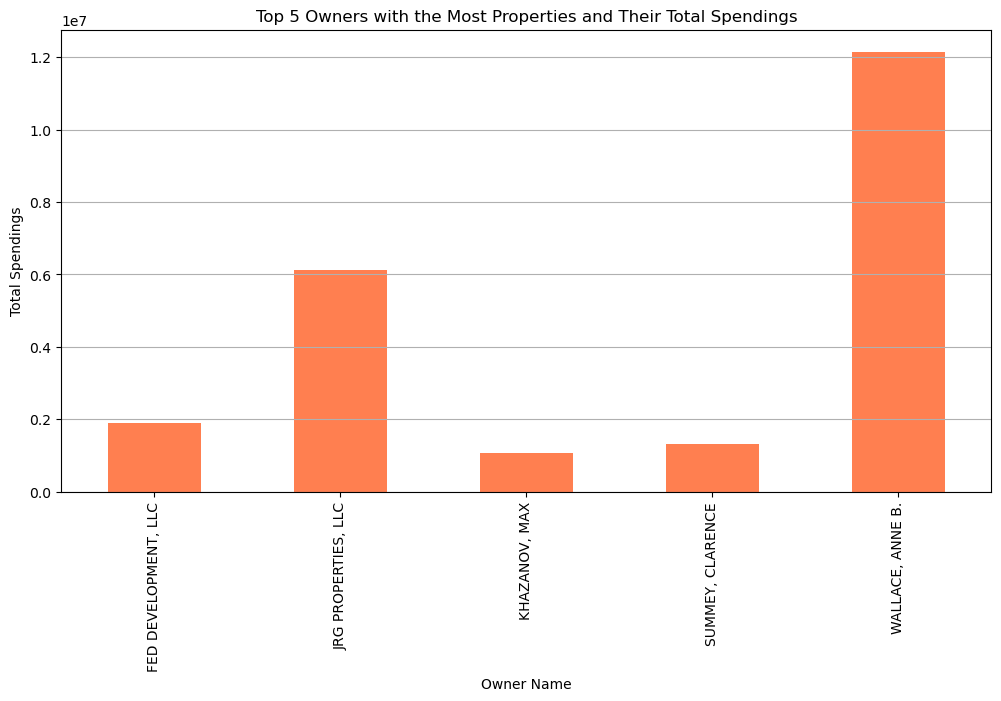

In [45]:
# create a chart for these top 5 people total spendings to buy these properties
# Group by 'OwnerName' and count the number of properties each owner has
owners_property_counts = df['OwnerName'].value_counts()

# Get the top 5 owners with the most properties
top_5_owners = owners_property_counts.head(5).index

# Calculate the total spendings for these top 5 owners
total_spendings = df[df['OwnerName'].isin(top_5_owners)].groupby('OwnerName')['SalePrice'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
total_spendings.plot(kind='bar', color='coral')
plt.xlabel('Owner Name')
plt.ylabel('Total Spendings')
plt.title('Top 5 Owners with the Most Properties and Their Total Spendings')
plt.grid(axis='y')
plt.show()